# **Introduction - HR Attrition**

For this assignment we will be exploring a small scenario. We will create data visualizations using matplotlib.pyplot, seaborn and altair. Ideally you will go through all of the mini assignments and end up with a full analysis of the situation. A notebook with an example of a given solution for each will be provided (eventually), but really this is about learning how to create and interpret these visualizations more intuitively.

This notebook has been created in a way, so that if you're feeling really stuck in one of the mini-assignments, move onto the next one instead. There are ***none*** of the visualizations that depend on each other, and so it is fairly straight forward to create them without panicking if you just cannot get it to work. So let's get started!

Imagine the following scenario: You're a data scientist/data analyst at a company, and your HR manager comes up to you and goes;

![](https://aaubs.github.io/ds-master/media/M1-aas1-img1.png)

Well, well, well, now we gotta figure out what is going on! Luckily we have access to the historical HR data of the company for this purpose. The HR manager would like to know some of the following key points in particular;
1. Which different groups are most likely to churn?
2. Based on the available data, what are the possible reasons for these individuals to churn in the first place?
3. Is there any indicators as to what kind of incentive we may be able to create to increase retainment, thus reducing the churn rate?

# **Import libraries**

Some of the module-specific library code set up has already been implemented for this notebook, but you will still need to import some libraries/modules. For this assignment you will need the following libraries:
- Altair (https://altair-viz.github.io/)
- matplotlib.pyplot (https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)
- Pandas (https://pandas.pydata.org/docs/)
- Seaborn (https://seaborn.pydata.org/)

**Import the necessary libraries**

In [5]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

# Set the Seaborn style to 'ggplot'
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [6]:
# Need to enable this for altair visualizations to show up in Google Colab
alt.renderers.enable('colab')

RendererRegistry.enable('colab')

# **Load in the data**

Link to the data on Kaggle (You can either try to use the method we (tried) to show you last friday, or alternatively, you can download and drag the .csv file into the folders on the left):
- https://www.kaggle.com/datasets/itssuru/hr-employee-attrition

**Load the data into a pandas dataframe.**

In [7]:
file_path = '/content/HR-Employee-Attrition.csv'
df = pd.read_csv(file_path, low_memory=False)

**Output the first 5 observations/rows of the dataframe**

In [8]:
# Print out first 5 rows of the data

df.head(5) #.head() automaticly shows 5 rows.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Print out the dataframe information to show the column names, number of rows, amount of Non-Null data rows per column and the data types in each column**

In [9]:
# Getting the dataframe structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
# .shape is showing the number of columns and rows in another format.
df.shape

(1470, 35)

**Let's start with some summary statistics to get a quick overview of our employee data. For this purpose we can use the .describe() method, as I am sure you have already been familiarized with.**

In [11]:
# Print out the descriptive summary stats for the dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# **Assignment 1 - Which different groups are most likely to churn?**

Okay, so first we need to figure out what kind of groups we can find within the data, and analyze these in terms of their attrition rates. Luckily we have a column named 'Attrition' for this very purpose that contains 'Yes' and 'No' for attrition or no attrition.

So based on the summary statistics, we can get a better overview of different variables. Let's try to list a few options:
- **Age** ranges from 18 to 60 years old, so splitting these into different age groups might tell us something about whether it's a particular age group that is likely to churn.
- **DistanceFromHome** ranges from 1 to 29, and this could also be a reason for attrition.
- **Jobrole:** It could be a particular position within the company that for some reason tends to make people quit their job.
- **Gender:** It could be a bigger percentage of men than women or vice versa that tends to quit the company for some reason or another.

## *Let's start by looking at the age groups*

![](https://aaubs.github.io/ds-master/media/M1-ass1-img2.png)

**Create age groups/bins and labels for these, that you believe makes sense for analysis.**

In [12]:
labels = ["teen", "20s", "30s", "40s", "50+"]
bins = pd.IntervalIndex.from_tuples([(18, 20), (20, 30), (30, 40), (40, 50), (50, 100)])

**Assign these groups to each employee as a new column within the dataframe. One way to do this, is to use the pd.cut() method to assign these to a new column. Remember to do the df['NewColumnName'] = pd.cut() with the appropriate parameter setup inside the () brackets**

In [13]:
df["AgeGroup"] = pd.cut(df.Age, bins=bins, labels=labels)
df["AgeGroupLabel"] = pd.cut(df.Age, bins=[18, 20, 30, 40, 50, 100], labels=labels)

print(df[['Age', 'AgeGroup', 'AgeGroupLabel']])

      Age  AgeGroup AgeGroupLabel
0      41  (40, 50]           40s
1      49  (40, 50]           40s
2      37  (30, 40]           30s
3      33  (30, 40]           30s
4      27  (20, 30]           20s
...   ...       ...           ...
1465   36  (30, 40]           30s
1466   39  (30, 40]           30s
1467   27  (20, 30]           20s
1468   49  (40, 50]           40s
1469   34  (30, 40]           30s

[1470 rows x 3 columns]


**You can validate that it worked by printing out the .head(5) of the column you created**

In [14]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,AgeGroupLabel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,"(40, 50]",40s
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,"(40, 50]",40s
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,"(30, 40]",30s
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,"(30, 40]",30s
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,"(20, 30]",20s


**Using this new column you have created, create a bar chart that shows the distribution of 'Yes' and 'No' for attrition between the different age groups**

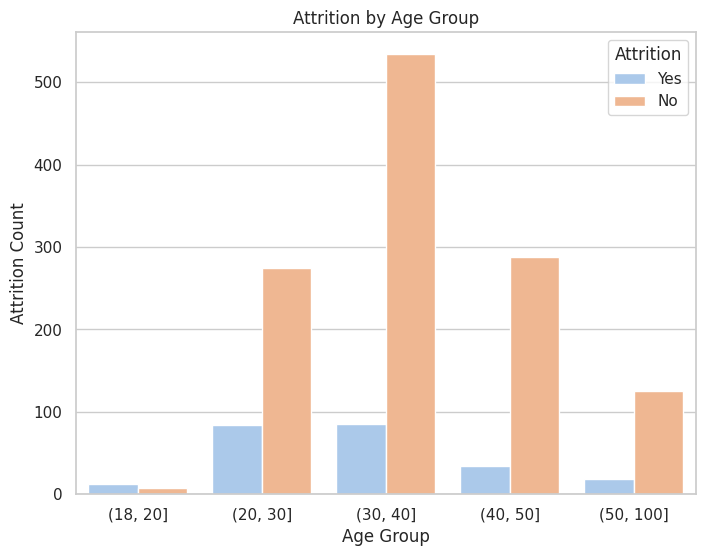

In [15]:
# Create a bar chart to visualize attrition by age group
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='AgeGroup', hue='Attrition')

# Add labels and a title
plt.xlabel('Age Group')
plt.ylabel('Attrition Count')
plt.title('Attrition by Age Group')

# Show the legend
plt.legend(title='Attrition', loc='upper right')

# Display the plot
plt.show()

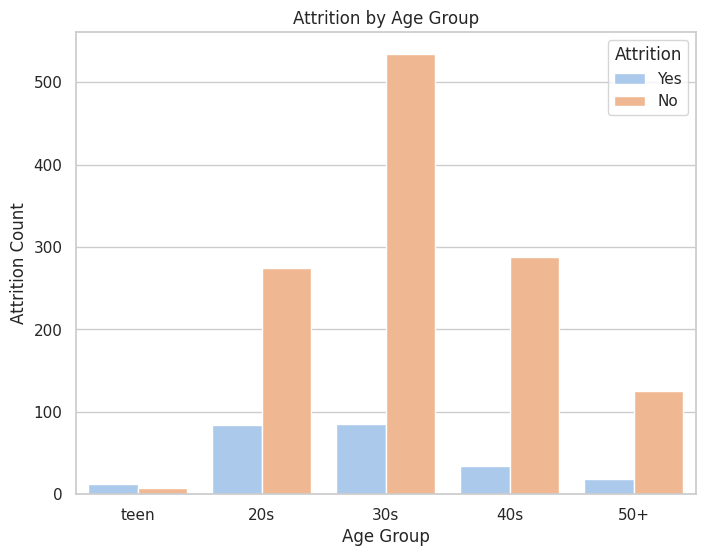

In [16]:
# Create a bar chart to visualize attrition by age group
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='AgeGroupLabel', hue='Attrition')

# Add labels and a title
plt.xlabel('Age Group')
plt.ylabel('Attrition Count')
plt.title('Attrition by Age Group')

# Show the legend
plt.legend(title='Attrition', loc='upper right')

# Display the plot
plt.show()

So based on this what can we conclude/deduct? Please discuss either in your groups or with yourself. Think about what other features we can use to add some degree of explainability to this, as that may be relevant further on in our analysis in terms of a bigger picture

We can deduce that the agegroup 20s andd 30s has the highest attrition rate

## *Let's find out if people are too lazy to travel far for work*

![](https://aaubs.github.io/ds-master/media/M1-ass1-img3.png)

**Let's first print out the descriptive stats for DistanceFromHome specifically. We can do this using the .describe() method:**

In [17]:
df[["DistanceFromHome"]].describe().T

,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0


**Let's then try visualizing this feature as a plot using KDE (Kernel Density Estimation). Create a KDE-plot using the pyplot and/or seaborn library**

<ipython-input-18-0b0b3dd67271>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.DistanceFromHome, x=None, y=None, label='KDE', shade=True)


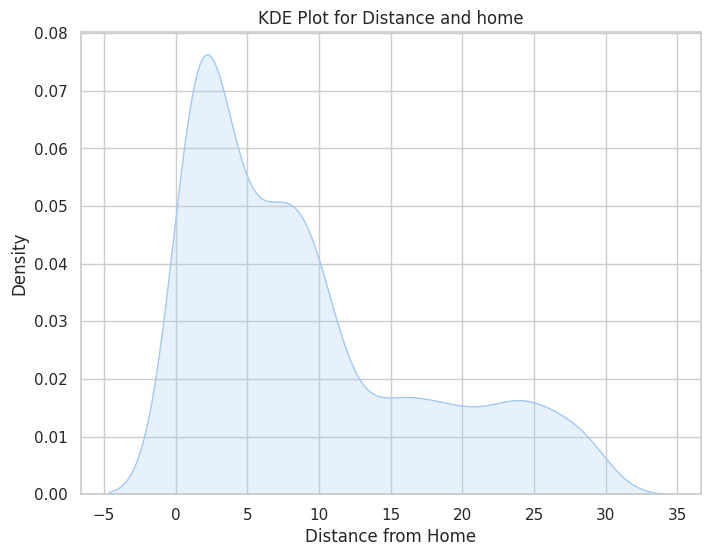

In [18]:
# Create a bar chart to visualize attrition by age group
plt.figure(figsize=(8, 6))
sns.kdeplot(df.DistanceFromHome, x=None, y=None, label='KDE', shade=True)

# Add labels and a title
plt.xlabel('Distance from Home')
plt.ylabel('Density')
plt.title('KDE Plot for Distance and home')

# Display the plot
plt.show()

**What can we deduct from this visualization? Is distance really an issue as far as attrition goes? Please discuss.

The graph shows attrition being higher the closer to the company an employee is. This might imply that distance is not the cause of attrition, maybe the location of the company is near a waste-dump.**



## *Is it particular job roles that tends to leave the company?*

![](https://aaubs.github.io/ds-master/media/M1-ass1-img4.png)

:**Let's try and visualize the attrition versus the job roles and find out if it's any particular job role(s) that are prone to suffer from attrition and churn. Let's first get the unique values for JobRole by using the .unique() method**

In [19]:
job_roles = df.JobRole.unique()
job_roles

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

**Create a bar chart using seaborn (countplot) and/or pyplot that shows the difference between 'Yes' and 'No' for attrition between all the different JobRoles. You can make the plot vertical or horizontal by placing the JobRole on either the X- or Y-axis.**

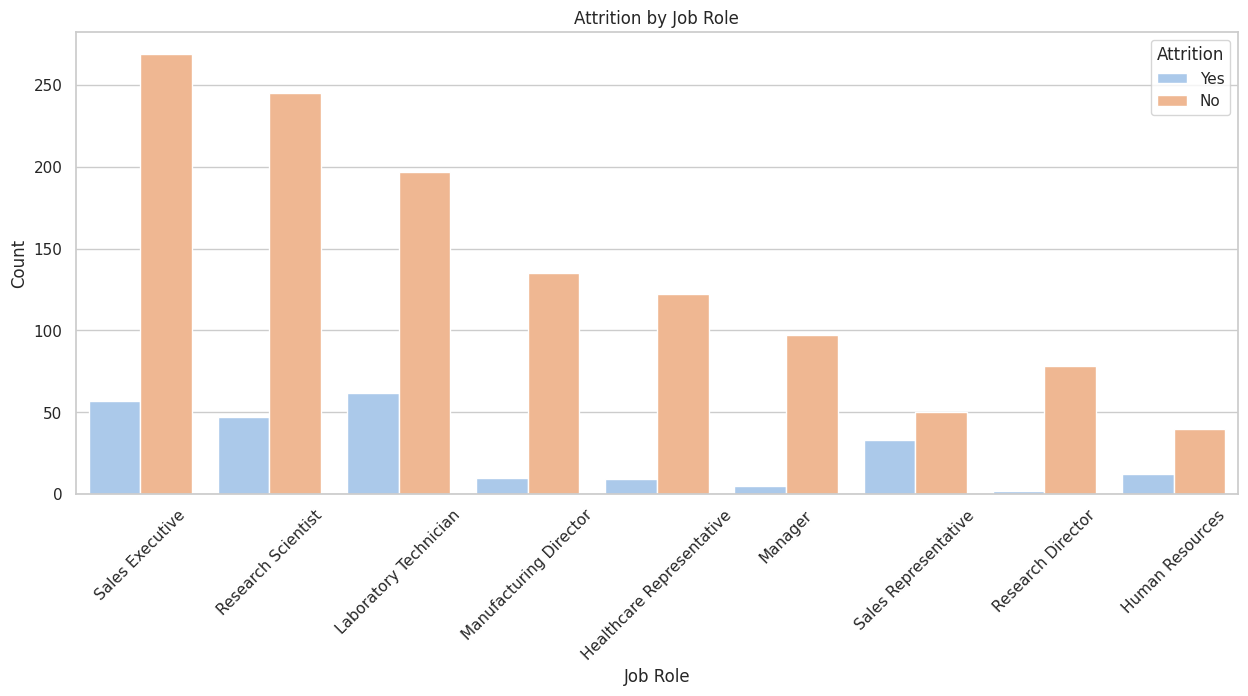

In [20]:
# Instantiate the pyplot figure. Adjust the figure size as needed
plt.figure(figsize=(15, 6))

# Create a horizontal bar plot to visualize attrition by job role
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.xticks(rotation=45)

# Add labels and a title
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')

# Show the legend
plt.legend(title='Attrition')

# Display the plot
plt.show()

We can see which roles have higher attrition, enableling action where it's most effecient. A more useful graph would be average years worked at the different positions and if possible taking into account if, when employees leave, that they leave the company and not attrition to the specific role in for instance a sales representative being promoted to a sales executive.

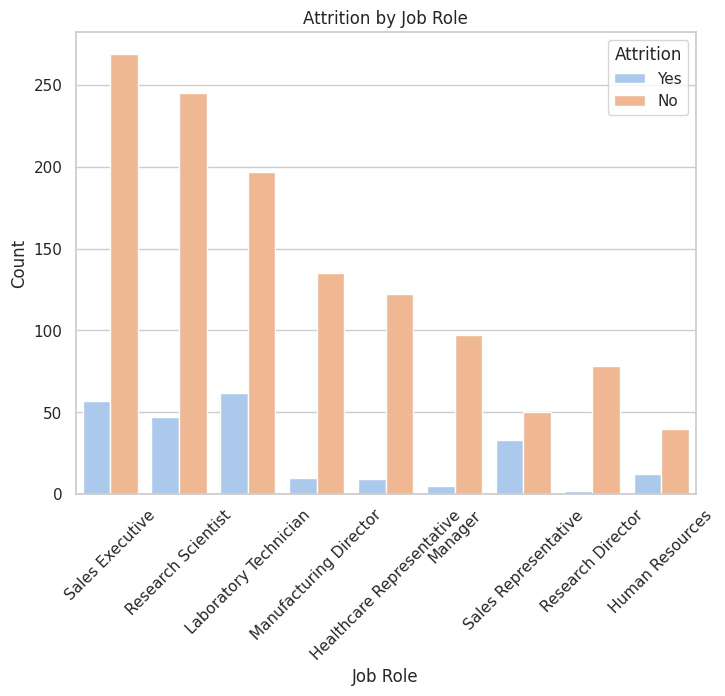

In [29]:
# Instantiate the pyplot figure. Adjust the figure size as needed
plt.figure(figsize=(8, 6))

# Create a horizontal bar plot to visualize attrition by job role
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.xticks(rotation=45)

# Add labels and a title
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')

# Show the legend
plt.legend(title='Attrition')

# Display the plot
plt.show()

**What can we deduct from this visualization? Might there be better features to visualize? Please reflect/discuss within your groups**

## *Do we maybe have some sort of gender difference going on within the company?*

Finally we want to see if there might be something going on in terms of the genders. It could be that there is something underlying going on in terms of inequality or similar, and this could be a possible reason for attrition.

**Using pyplot, create a pie chart showing the distribution of attrition == 'Yes' for males versus females. You will need to separate the 'Yes' and 'No' for attrition in order to do this. You can use the index of the separated dataframe as the labels by calling separated_df.index (separated_df being whatever you named the variable you saved the separated df to)**

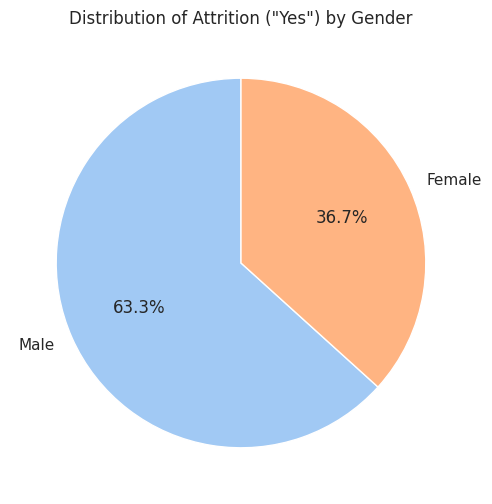

In [22]:
# Separate the dataframe based on Attrition
attrition_yes = df[df.Attrition == 'Yes']
gender_count = attrition_yes.Gender.value_counts()

sizes = gender_count.values
labels = gender_count.index

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Attrition ("Yes") by Gender')

# Display the plot
plt.show()


**Can we conclude anything based on this? Are there better ways to visualize this? Please discuss

That the female employees are less likely to contribute to attrition**

# **Assignment 2 - Based on the available data, what are the possible reasons for these individuals to churn in the first place?**

![](https://aaubs.github.io/ds-master/media/M1-ass1-img5.png)

Alright, so now that you've analyzed which groups that seem to suffer from attrition, we need to figure out possible reasons for attrition. There are plenty of features that could potentially explain this, but let's stick to a just a few for now. Let's try and list a few possibilities:
- **Jobsatisfaction** is a quite obvious metric to check against **Attrition**. If people aren't satisfied with their position, they might leave to get more work satisfaction.
- We noticed that it was primarily the middle aged bins that suffered from attrition. This could indicate that they could've been at the company for a number of years, so **YearsAtCompany** or **YearsInCurrentRole** might be some interesting metrics to visualize against attrition.

## *Is a low job satisfaction the reasoning behind the attrition?*

**First let us get some information for the columns we're interested in to know what kind of values we're dealing with. In this case, let's print out the unique values for JobSatisfaction and Attrition**

In [23]:
# Print unique Attrition values

unique_Attrition = df.Attrition.unique()
print(unique_Attrition)

['Yes' 'No']


In [24]:
# Print unique JobSatisfaction values

unique_job_satisfaction = df.JobSatisfaction.unique()
print(unique_job_satisfaction)

[4 2 3 1]


**Using the Altair library, create a stacked bar chart, with JobSatisfaction on the X-axis, and the employee counts on the Y-axis *( for this you can use count() )*. We also want to color the bar stacks based on Attrition.**

In [25]:
# Calculate employee counts
JobSatisfaction_grouping = df.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Count')

# Create a stacked bar chart
StackedBarChart_JobSatisfaction = alt.Chart(JobSatisfaction_grouping).mark_bar().encode(
    x='JobSatisfaction:O',
    y='Count:Q',
    color='Attrition:N',
    tooltip=['JobSatisfaction', 'Count', 'Attrition']
).properties(
    width=500,
    height=300,
    title='Job Satisfaction and employee count'
)

StackedBarChart_JobSatisfaction.configure_title(
    fontSize=20,
    font='Courier',
    anchor='start',
    color='gray')

# Display the chart
StackedBarChart_JobSatisfaction

alt.Chart(...)

**What does this indicate? Please discuss

This stacked bar chart allows us to visually explore the relationship between job satisfaction and attrition, identify patterns, and make decisions to improve employee retention and satisfaction within the organization. From this specific chart we can see that the higher the job satisfaction is, the attrition rate is lowe, which is expected.**

## *Are people quickly looking for opportunities elsewhere?*

**Using Altair, create a stacked bar chart with the count() on the Y-axis, and the YearsAtCompany on the X-axis. We want the bars to be colored based on Attrition.**

In [26]:
# Calculate employee counts
YearsAtCompany_grouping = df.groupby(['YearsAtCompany', 'Attrition']).size().reset_index(name='Count')

# Create a stacked bar chart
StackedBarChart_YearsAtCompany = alt.Chart(YearsAtCompany_grouping).mark_bar().encode(
    x='YearsAtCompany:O',
    y='Count:Q',
    color='Attrition:N',
    tooltip=['YearsAtCompany', 'Count', 'Attrition']
).properties(
    width=500,
    height=300,
    title='Years At Company and employee count'
)

StackedBarChart_YearsAtCompany.configure_title(
    fontSize=20,
    font='Courier',
    anchor='start',
    color='gray')

# Display the chart
StackedBarChart_YearsAtCompany

alt.Chart(...)

**What can we deduct from this visual? Please discuss

this stacked barchart actually shows us that it seems like its more often employees get somewhat a feeling of attrition in the first years.That stable employees are stable, also that something which requires further examination happens between the start of year 0 and the end of year 1.  **

# **Assignment 3 - What incentives can we create to reduce the churn rate?**

So far we have identified some possible groups and causes for the attrition rates, now it's time that we find out how we might be able to reduce it

![](https://aaubs.github.io/ds-master/media/M1-ass1-img6.png)

## *Are we paying our employees enough for their commitment?*

Based on our analysis so far, it could indicate that people are seeking other opportunities fairly quickly, so let's see how this correlates with the feature 'MonthlyRate' as this should indicate how peoples can expect their pays to rise along their progress within the company
- **Using Altair, create a boxplot that shows how the MonthlyRate distribution changes as their JobLevel increases.**

In [27]:
# Create a box plot of MonthlyRate by JobLevel

# Calculate employee counts
JobLevel_MonthlyRate_grouping = df.groupby(['MonthlyRate', 'JobLevel']).size().reset_index(name='Count')

# Create a boxplot
Boxplot_JobLevel_MonthlyRate = alt.Chart(JobLevel_MonthlyRate_grouping).mark_boxplot().encode(
    x='JobLevel:O',  # Ordinal data for JobLevel
    y='MonthlyRate:Q'  # Quantitative data for MonthlyRate
).properties(
    width=500,
    height=300,
    title='MonthlyRate Distribution by JobLevel'
)

# Customize the appearance of the chart (optional)
Boxplot_JobLevel_MonthlyRate = Boxplot_JobLevel_MonthlyRate.configure_title(
    fontSize=20,
    font='Arial',
    anchor='start',
    color='gray'
)

# Display the chart
Boxplot_JobLevel_MonthlyRate

alt.Chart(...)

**What can we interpret from this visual? Please discuss

In this boxplot we are visualizing the monthly rate distribution across diffrent job levels, to analyse and figure out which diffrences ther could be

The boxplot lets us see pretty easily that there isn't any larger diffrences besides the mean of the monthly rates**

Is it the same case for the distribution of DailyRate?
- **Create another boxplot that shows the distribution of DailyRate across JobLevel**

In [28]:
# Create a box plot of DailyRate by JobLevel

# Calculate employee counts
JobLevel_DailyRate_grouping = df.groupby(['DailyRate', 'JobLevel']).size().reset_index(name='Count')

# Create a boxplot
Boxplot_JobLevel_DailyRate = alt.Chart(JobLevel_DailyRate_grouping).mark_boxplot().encode(
    x='JobLevel:O',  # Ordinal data for JobLevel
    y='DailyRate:Q'  # Quantitative data for DailyRate
).properties(
    width=500,
    height=300,
    title='MonthlyRate Distribution by JobLevel'
)

# Customize the appearance of the chart (optional)
Boxplot_JobLevel_DailyRate = Boxplot_JobLevel_DailyRate.configure_title(
    fontSize=20,
    font='Arial',
    anchor='start',
    color='gray'
)

# Display the chart
Boxplot_JobLevel_DailyRate

alt.Chart(...)

**What can we interpret from this visual? (It may make sense to take the previous one into consideration, in terms of performing further analysis as to some underlying causes)

the following graph tells us what diffrences there is in the daily rate compared to diffrent job levels

We can therefore conclude that the daily rates mean is pretty similar, alongside with minor diffrences in min and max compared across the 5 diffrent job levels**

# **The End**

**You made it to the end! Good job!**

![](https://aaubs.github.io/ds-master/media/M1-ass1-img7.png)

**I highly encourage you to keep playing around with this dataset, or other similar datasets that have a good amount of features to perform EDA and visualizations with. It's a good way to sharpen those coding skillz, and will help you perform in-depth analysis in your future careers. As you can see, Altair, pyplot and Seaborn are strong visualization libraries, and having knowledge of how best to deploy these visualizations, you can add some *KAPOW* to your analysis. Kaggle.com provides plenty of cool datasets for a vast variety of analysis and applications**